<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = r'C:\Users\Daniel_Heffley\Desktop\1 27 2020\DAT-course-materials-students-master\homework\sacramento_real_estate_transactions.csv'

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

UsageError: Line magic function `%` not found.


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [4]:
# A:
df = pd.read_csv(sac_csv)

In [5]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [8]:
df.isna().sum()#no na values


street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [10]:
df.dtypes #only integer objects probably make sense to use


street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

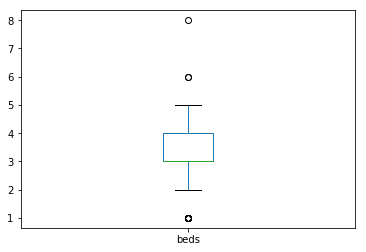

In [19]:
df.beds.plot(kind = 'box')

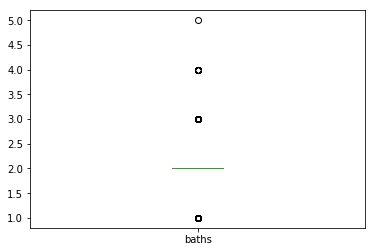

In [20]:
df.baths.plot(kind = 'box')

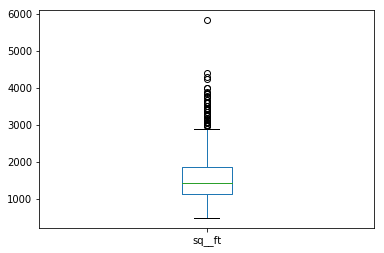

In [21]:
df.sq__ft.plot(kind = 'box')

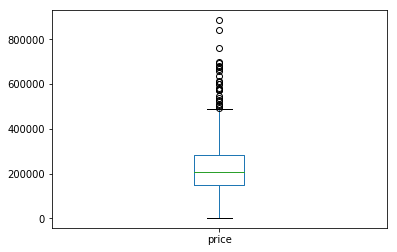

In [33]:
df.price.plot(kind = 'box')

In [ ]:
#we should drop all the rows with zeroes for sq_ft, baths, or beds 
#There is also one negative sq footage which should also be dropped
#Negative prices need to go as well

In [30]:
df = df[~(df['sq__ft'] <= 0)] 
df = df[~(df['price'] <= 0)] 

In [32]:
round(df.corr(),2)

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.00,-0.07,-0.10,-0.10,-0.22,-0.14,-0.56
beds,-0.07,1.00,0.65,0.70,0.44,-0.11,0.05
baths,-0.10,0.65,1.00,0.72,0.50,-0.08,0.11
sq__ft,-0.10,0.70,0.72,1.00,0.69,-0.10,0.13
price,-0.22,0.44,0.50,0.69,1.00,0.06,0.28
latitude,-0.14,-0.11,-0.08,-0.10,0.06,1.00,0.35
longitude,-0.56,0.05,0.11,0.13,0.28,0.35,1.00


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

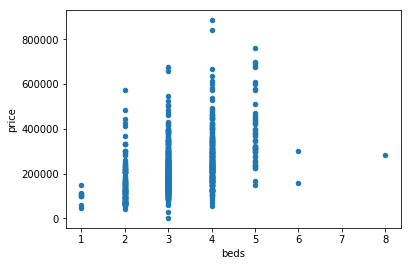

In [34]:
df.plot.scatter(x = 'beds', y = 'price')

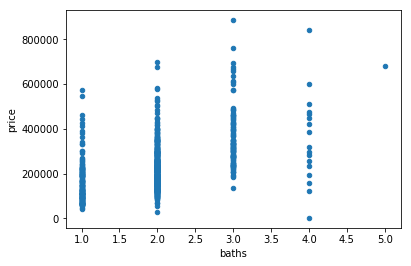

In [35]:
# A
df.plot.scatter(x = 'baths', y = 'price')

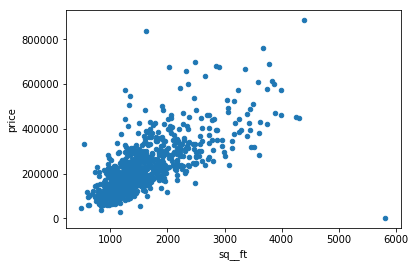

In [36]:
df.plot.scatter(x = 'sq__ft', y = 'price')

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A: sq__ft seems to have the highest correlation value

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [53]:
import statsmodels.api as sm
def return_slope_and_intercept(X,Y):
    endog = df['price']
    exog = sm.add_constant(df['sq__ft'])
    model = sm.OLS(endog,exog)
    results = model.fit()
    return results.params[1],results.params[0]

In [54]:
# A:
import statsmodels.api as sm

return_slope_and_intercept(df['sq__ft'],df['price'])



(125.31418257510136, 29984.361726519826)

### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A: the intercept of 29,984 means that if the square footage were zero theretically, the house would be
# worth 29,984 dollars
# The slope of 125 signifies that every additional square foot of space correlates with 125 more dollars to sale price

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A: This model could be used for predition by simply plugging in a square footage and coming away with a predicted price
# We could infer that larger houses are more in demand and thus go for more money

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A: